In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torch.utils.data import random_split
from torchvision import datasets 
from torchvision import transforms 
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import torchvision.models as models
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

from NN_setting import setting
# from NN_model import print_models, AlexNet
from NN_train import train

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
mydata = setting()

In [4]:
getdata = datasets.ImageFolder
dir = './input/cat_and_dog/'
dircts = ['training_set/training_set','test_set/test_set']
transform = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])
mydata.getDataset(getdata, dir, dircts, transform)

trainset length: 8005 / testset length 2023


In [5]:
mydata.getValid(valid_s=0.2)

train length: 6404 / valid length: 1601
torch.Size([3, 224, 224]) 0


In [6]:
batch_s=16
trainloader, validloader, testloader = mydata.getDataloader(batch_s)

train, valid, test: 401 101 127


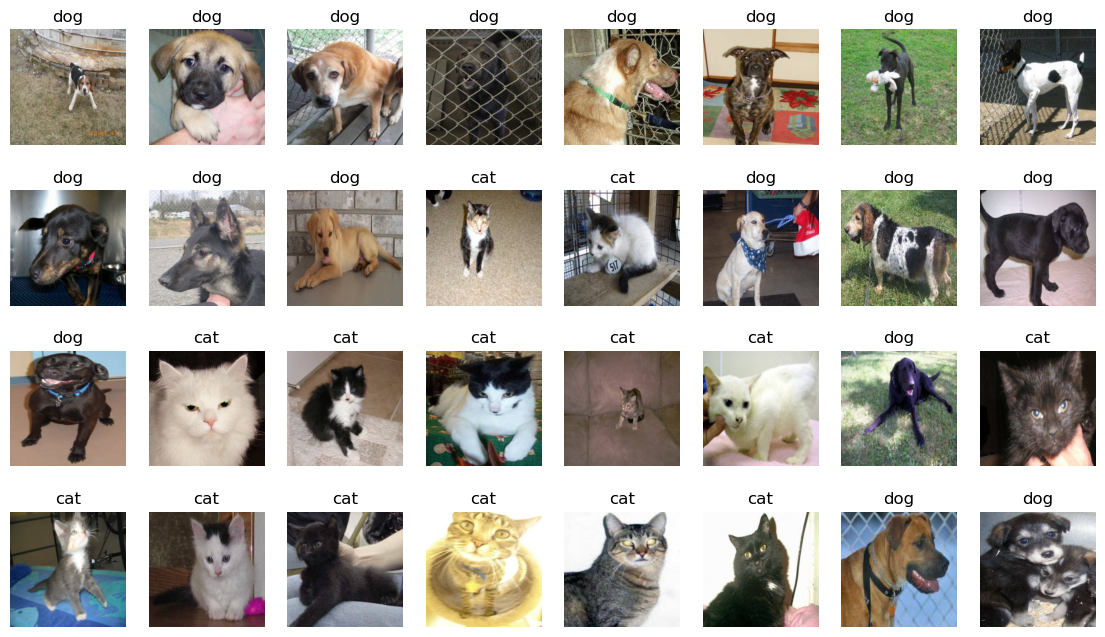

In [7]:
labels_map = {0 : 'cat', 1 : 'dog'}
mydata.showimg(labels_map, mydata.trainset)

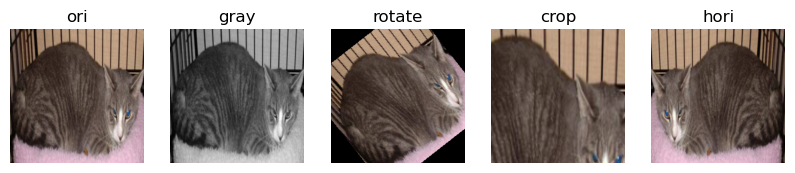

In [8]:
train_iter = iter(trainloader)
imgs, labels = next(train_iter)
sample_img = imgs[1]
mydata.showtransimg(sample_img)

In [9]:
if:

SyntaxError: invalid syntax (879943805.py, line 1)

In [ ]:
# https://github.com/pytorch/vision/tree/6db1569c89094cf23f3bc41f79275c45e9fcb3f3/torchvision/models
model = models.resnet101(weights=True)

for parameter in model.parameters():
    parameter.requires_grad = False 
for parameter in model.classifier.parameters():
    parameter.requires_grad = True 
model.classifier

In [ ]:
model.classifier = nn.Sequential(
                            # fill here
                            )
model.classifier

In [ ]:
lr = 0.001; patience = 7; epochs = 55
model = model.to(device)
loss_fn = nn.CrossEntropyLoss() # loss function
optimizer = optim.Adam(model.parameters(), lr=lr) # optimizer
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=4, verbose=True)

myNN = train(model, loss_fn, optimizer, trainloader, validloader, testloader, 
             scheduler, device, epochs, patience, batch_s)
myNN.train_loop()

In [ ]:
myNN.result_plot()

In [ ]:
myNN.check(unsq=True, rand_idx=10)

In [ ]:
myNN.evaluate(valid=False)

In [ ]:
torch.save(model.state_dict(), 'last_checkpoint.pth')
myNN.load_model(dirct='last_checkpoint.pth', model)

In [ ]:
myNN.load_model(dirct='best_checkpoint.pth', model)